In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data=pd.read_csv("my_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
data1=data.iloc[:,5:]
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# 10% Support and 60% Confidence

In [7]:
#Apriori
freq = apriori(data1, min_support=0.1)
freq

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [8]:
rule = association_rules(freq,metric="lift",min_threshold=0.6)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(0),(2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
rule[rule.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


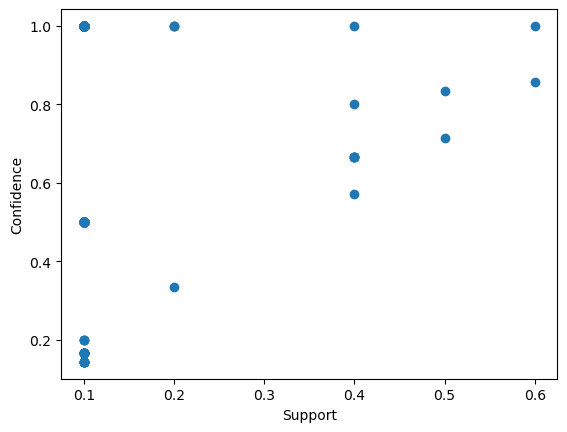

In [11]:
plt.scatter(rule["support"],rule["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# 5% Confidence and 60% Support

In [12]:
freq1 = apriori(data1,min_support=0.05,use_colnames=True)
freq1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [13]:
rule1 = association_rules(freq1, metric="lift",min_threshold=0.6)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(LOTR2, Green Mile, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Green Mile),"(LOTR2, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


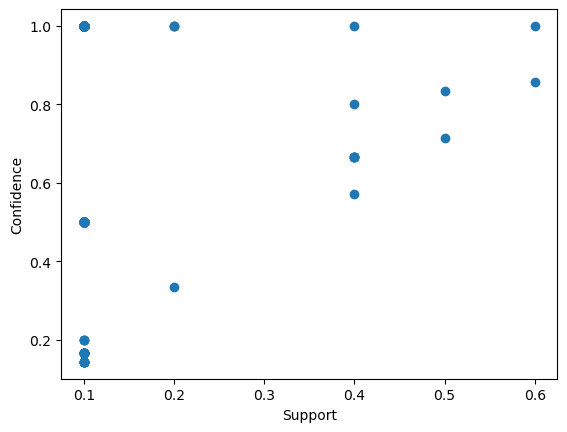

In [14]:
plt.scatter(rule1["support"],rule1["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()